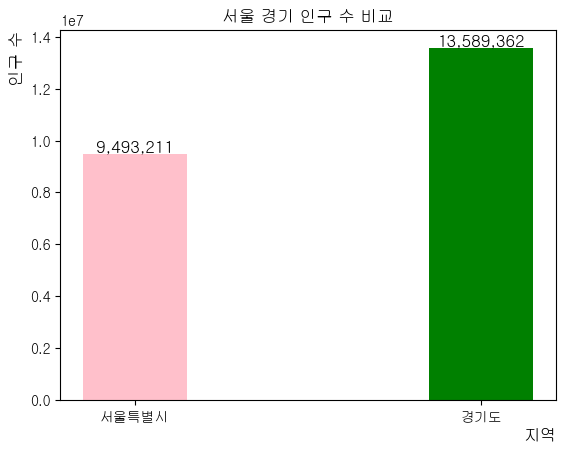

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from chart_studio import plotly
import cufflinks as cf
cf.go_offline(connected=True)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# #인구수
loc = ["서울특별시","경기도"]
gg = [9493211, 13589362]

index = ['인구 수']
pp = plt.bar(loc, gg,
        color=['pink', 'green'],
        width=0.3)

# df.plot.bar(color = {"서울특별시":'#FF0000', "경기도":'green'})
# plt.gca().set_facecolor('#E6F0F8') #배경색
for rect in pp:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, format(int('%d' % height), ','), ha='center', va='bottom', size = 12)
plt.title("서울 경기 인구 수 비교")
plt.xlabel("지역", size =12, loc='right')
plt.ylabel("인구 수", size =12, loc='top')
plt.show()

#은행 수 / 지역별 인구 



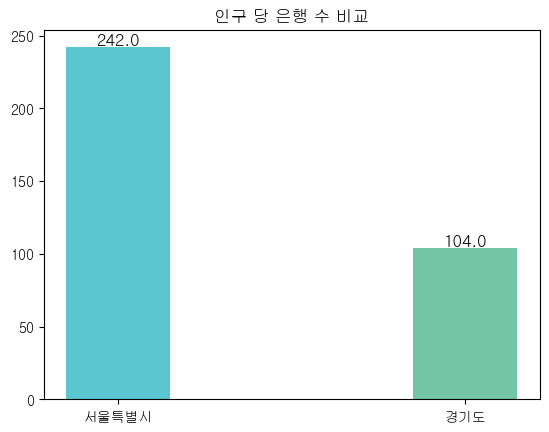

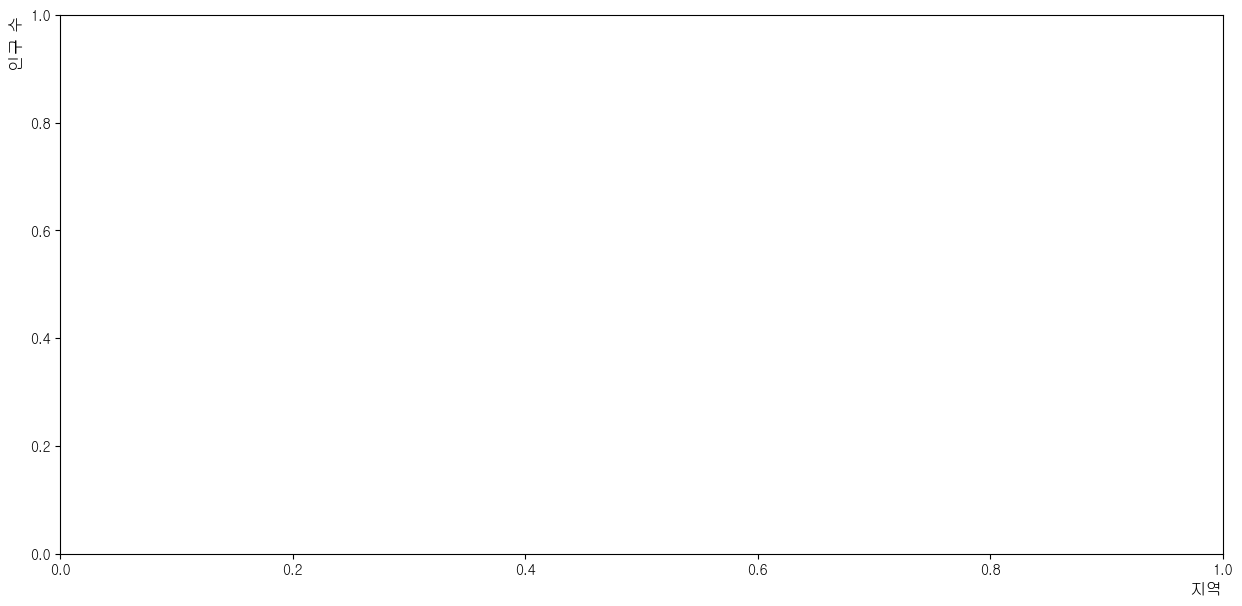

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
from chart_studio import plotly
import cufflinks as cf
cf.go_offline(connected=True)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# #인구수
loc = ["서울특별시","경기도"]
percent = [242, 104]



index = ['인구 수']
pp = plt.bar(loc, percent,
        color=['#5ac6d0', '#72c6a5'],
        width=0.3)

# df.plot.bar(color = {"서울특별시":'#FF0000', "경기도":'green'})
# plt.gca().set_facecolor('#E6F0F8') #배경색
for rect in pp:
    height = int(rect.get_height())
    plt.text(rect.get_x() + rect.get_width()/2.0, height, format(float('%.3f' % height), ','), ha='center', va='bottom', size = 12)
plt.title("인구 당 은행 수 비교")
plt.figure(figsize = [15,7])
plt.xlabel("지역", size =12, loc='right')
plt.ylabel("인구 수", size =12, loc='top')
plt.show()

#은행 수 / 지역별 인구 



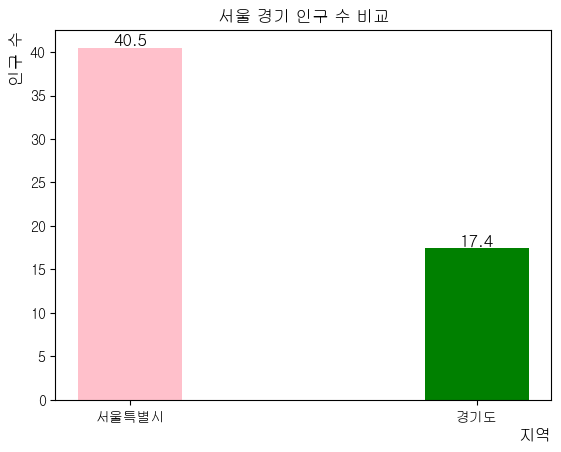

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
from chart_studio import plotly
import cufflinks as cf
cf.go_offline(connected=True)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# #인구수
loc = ["서울특별시","경기도"]
percent = [40.5, 17.4]



index = ['인구 수']
pp = plt.bar(loc, percent,
        color=['pink', 'green'],
        width=0.3)

# df.plot.bar(color = {"서울특별시":'#FF0000', "경기도":'green'})
# plt.gca().set_facecolor('#E6F0F8') #배경색
for rect in pp:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, format(float('%.2f' % height), ','), ha='center', va='bottom', size = 12)
plt.title("인구 당 은행 수 비교")
plt.xlabel("지역", size =12, loc='right')
plt.ylabel("인구 수", size =12, loc='top')
plt.show()

#은행 수 / 지역별 인구 



In [ ]:
import pandas as pd
import folium
import json
file_path = './경기도인구데이터.xlsx'
df=pd.read_excel(file_path,index_col='구분',engine='openpyxl')
df.columns = df.columns.map(str)
geo_path = './경기도행정구역경계.json'
try :
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except : 
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

g_map = folium.Map(location=[37.58,127.0],zoom_start=9)
year ='2007'

# Choropleth 클래스로 단계구분도 표시하기
# fill_color : 색상 파레트 설정 

folium.Choropleth(geo_data=geo_data,   # 지도 경계
                  data = df[year],     # 표시하려는 데이터 
                  columns = [df.index, df[year]],   # 열 지정 
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000,100000,300000,500000,700000],
                  key_on='feature.properties.name',
                  ).add_to(g_map)
g_map.save('./gyonggi_population_'+ year + '.html')